<a href="https://colab.research.google.com/github/Fasiloc/Machine_Learning_learn-repo/blob/main/Assignments/Assignment_9_K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics as sm

This dataset was constructed by adding elevation information to a 2D road network in North Jutland, Denmark (covering a region of 185 x 135 km^2). Elevation values where extracted from a publicly available massive Laser Scan Point Cloud for Denmark . This 3D road network was eventually used for benchmarking various fuel and CO2 estimation algorithms. This dataset can be used by any applications that require to know very accurate elevation information of a road network to perform more accurate routing for eco-routing, cyclist routes etc. For the data mining and machine learning community, this dataset can be used as 'ground-truth' validation in spatial mining techniques and satellite image processing. It has no class labels, but can be used in unsupervised learning and regression to guess some missing elevation information for some points on the road.


In [ ]:
column_names = ['OpenStreetMap_ID','longitude','latitude','altitude']
df = pd.read_csv('3D_spatial_network.csv',names=column_names)

In [ ]:
df.head(10)

,OpenStreetMap_ID,longitude,latitude,altitude
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740485,18.279465
4,144552912,9.351053,56.740486,18.422974
5,144552912,9.351475,56.740502,19.124889
6,144552912,9.352127,56.740558,19.590593
7,144552912,9.352420,56.740597,19.621764
8,144552912,9.352584,56.740629,19.659931
9,144552912,9.352726,56.740663,19.490670


Checking null values

In [ ]:
df.shape

(374907, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374907 entries, 0 to 374906
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   OpenStreetMap_ID  374907 non-null  int64  
 1   longitude         374907 non-null  float64
 2   latitude          374907 non-null  float64
 3   altitude          374907 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 11.4 MB


removing un nessesary datas

In [ ]:
df = df.drop(['OpenStreetMap_ID'],axis=1)

visualizing data

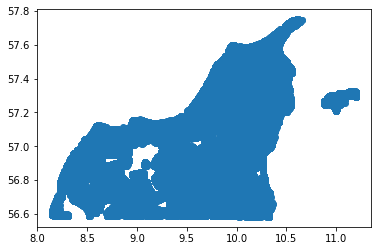

In [ ]:
plt.scatter(x=df['longitude'],y=df['latitude'])

Creating model an finding centroid

In [ ]:
model = KMeans(n_clusters=3,).fit(df)
centroids = model.cluster_centers_
centroids

array([[ 9.9375113 , 57.04248522, 59.82589542],
       [ 9.75325828, 57.11404116,  8.45057728],
       [ 9.62658059, 57.03771851, 29.61036583]])

Visualizing results

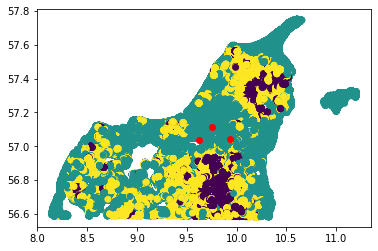

In [ ]:
plt.scatter(x=df['longitude'],y=df['latitude'],c=model.labels_.astype(float))
plt.scatter(centroids[:,0],centroids[:,1],c='red')

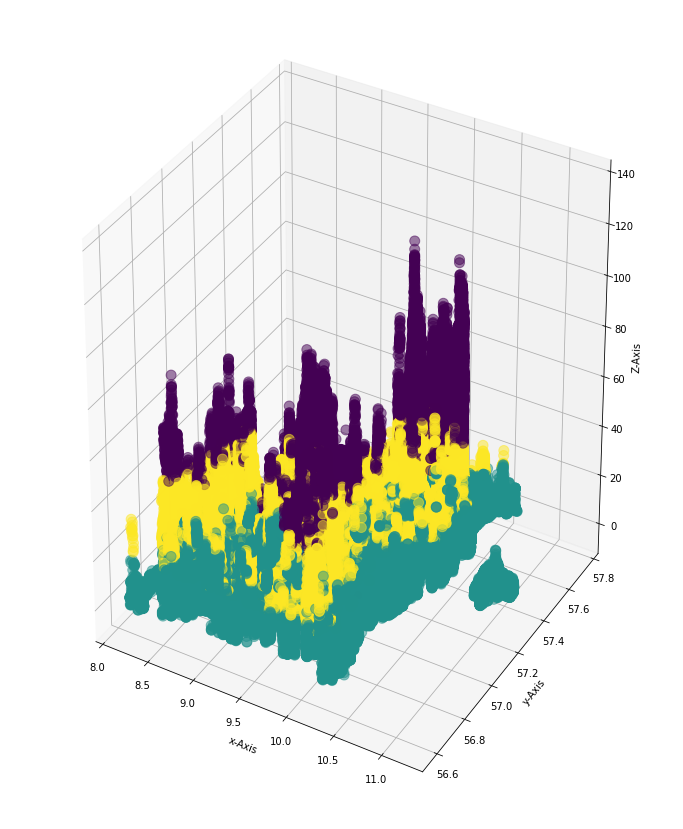

In [ ]:
fig = plt.figure(figsize=(12, 15))
a = fig.add_subplot(projection='3d')
a.scatter(df['longitude'], df['latitude'], df['altitude'],c= model.labels_.astype(float), s=100, alpha=0.5)
plt.xlabel('x-Axis')
plt.ylabel('y-Axis')
a.set_zlabel('Z-Axis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

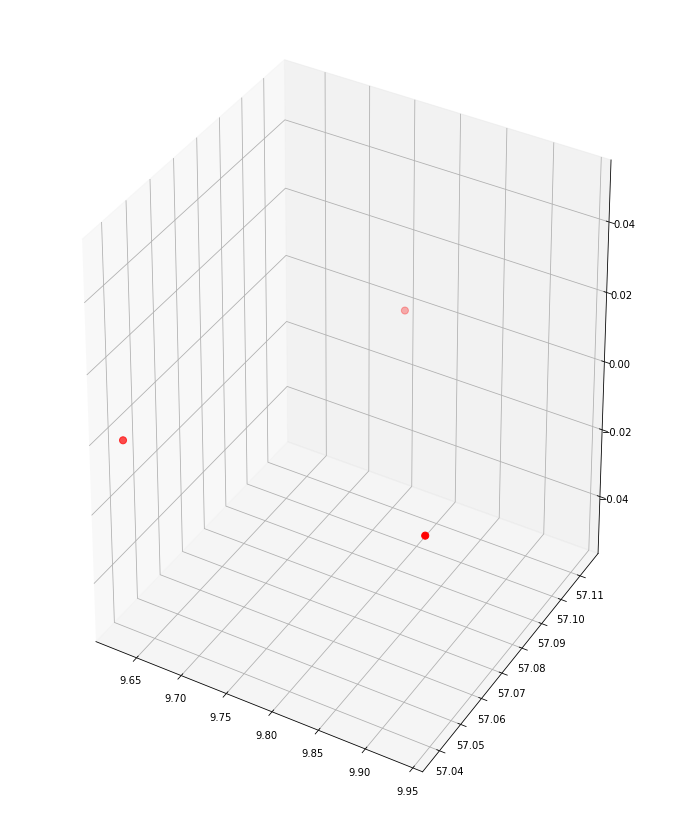

In [ ]:
fig = plt.figure(figsize=(12, 15))
a = fig.add_subplot(projection='3d')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)